<a href="https://colab.research.google.com/github/2320030111-Manoj/AIML--_--Programs/blob/main/Random_movement%2C_A_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

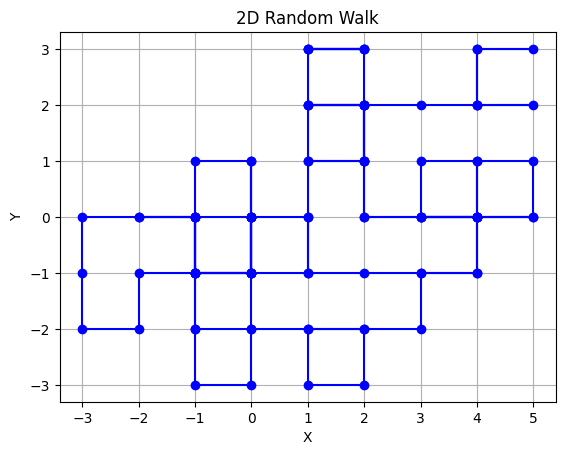

In [1]:
import matplotlib.pyplot as plt
import random

# Initialize starting position
x, y = 0, 0

# Store the coordinates for plotting
x_positions = [x]
y_positions = [y]

# Number of steps for the random walk
num_steps = 100

# Random movement simulation
for _ in range(num_steps):
    step_direction = random.choice(['up', 'down', 'left', 'right'])

    if step_direction == 'up':
        y += 1
    elif step_direction == 'down':
        y -= 1
    elif step_direction == 'left':
        x -= 1
    elif step_direction == 'right':
        x += 1

    # Store the new position
    x_positions.append(x)
    y_positions.append(y)

# Plot the random walk
plt.plot(x_positions, y_positions, marker='o', color='blue')
plt.title('2D Random Walk')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Show the plot
plt.show()


In [2]:
import heapq

# A* Algorithm function
def astar(grid, start, goal):
    # Priority queue to store the nodes to explore (heap)
    open_list = []
    heapq.heappush(open_list, (0, start))

    # Dictionary to store the cost of reaching each node
    g_cost = {start: 0}

    # Dictionary to store the path taken
    came_from = {start: None}

    # Define possible movement directions (up, down, left, right)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    # Heuristic function (Manhattan distance)
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    while open_list:
        # Get the node with the lowest f cost
        current_f, current = heapq.heappop(open_list)

        # If we reached the goal, reconstruct the path
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]  # Return reversed path

        # Explore the neighbors
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Check if neighbor is within grid bounds
            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]):
                # Ignore blocked cells
                if grid[neighbor[0]][neighbor[1]] == 1:
                    continue

                # Calculate new g cost
                new_g_cost = g_cost[current] + 1

                # If this path to the neighbor is shorter or neighbor hasn't been visited
                if neighbor not in g_cost or new_g_cost < g_cost[neighbor]:
                    g_cost[neighbor] = new_g_cost
                    f_cost = new_g_cost + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_cost, neighbor))
                    came_from[neighbor] = current

    return None  # No path found

# Example grid (0 = open space, 1 = blocked)
grid = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

# Start and goal positions
start = (0, 0)
goal = (4, 4)

# Run A* algorithm
path = astar(grid, start, goal)

# Print the path found
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
